**Logistic Regression**

In [1]:
import nltk
from os import getcwd

In [2]:
nltk.download('twitter_samples')
nltk.download('stopwords')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\Mit\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import numpy as np 
import pandas as pd
from nltk.corpus import twitter_samples

# from utils import process_tweet, build_freqs

In [3]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')


# split the data into two pieces, one for training and one for testing (validation set) 
test_pos = all_positive_tweets[4000:]
train_pos = all_positive_tweets[:4000]
test_neg = all_negative_tweets[4000:]
train_neg = all_negative_tweets[:4000]

train_x = train_pos + train_neg 
test_x = test_pos + test_neg

In [4]:
train_y = np.append(np.ones((len(train_pos), 1)), np.ones((len(train_neg), 1)), axis = 0)
test_y = np.append(np.ones((len(test_pos), 1)), np.ones((len(test_neg), 1)), axis = 0)

In [5]:
print("shape of train_y:", train_y.shape)
print("shape of test_y:", test_y.shape)

shape of train_y: (8000, 1)
shape of test_y: (2000, 1)


In [6]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
import re
import string

def process_tweet(tweet):
    """Process tweet function.
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet

    """
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean

In [7]:
def build_freqs(tweets, ys):
    """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its
        frequency
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

In [8]:
# Create frequency dictionary
freqs = build_freqs(train_x, train_y)

print("type(freqs) = " + str(type(freqs)))
print("len(freqs) = " + str(len(freqs.keys())))

type(freqs) = <class 'dict'>
len(freqs) = 9085


**Process tweet**

The given function process_tweet() tokenize the tweet into individual words, removes stop words and applies stemming

In [9]:
print('This is an example of a positive tweet: \n', train_x[0])

This is an example of a positive tweet: 
 #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)


In [10]:
print("The process of Tweet:\n", process_tweet(train_x[0]))

The process of Tweet:
 ['followfriday', 'top', 'engag', 'member', 'commun', 'week', ':)']


**Logistic regression**



In [11]:
import math
def sigmoid(z):
    return (1 / (1 + np.exp(-z)))
    

In [12]:
# Testing your function 
if (sigmoid(0) == 0.5):
    print('SUCCESS!')
else:
    print('Oops!')

if (sigmoid(4.92) == 0.9927537604041685):
    print('CORRECT!')
else:
    print('Oops again!')

SUCCESS!
CORRECT!


**Logistic regression: regression and a sigmoid**

Logistic regression takes a regular linear regression, and applies a sigmoid to the output of the linear regression.

Regression:



Logistic regression;

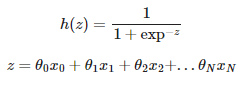

We will refer to 'z' as the 'logits'.



**Cost function and Gradient**

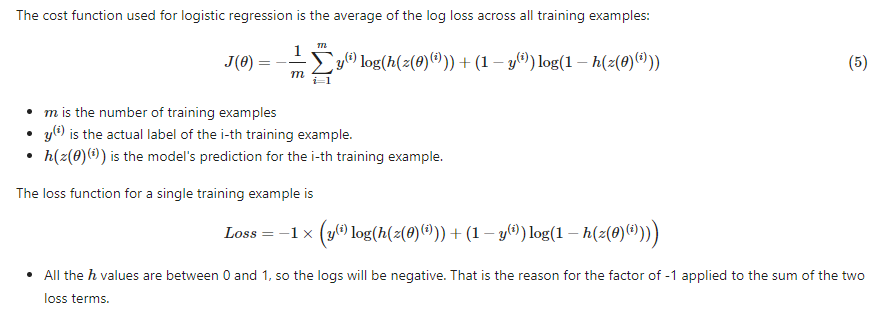



**Update the weights**

To update your weight vector, you will apply gradient descent to iteratively improve your model's predictions.
The gradient of the cost function with respect to one of the weights theta j is:

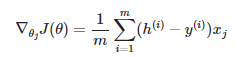



**Implement gradient descent function**

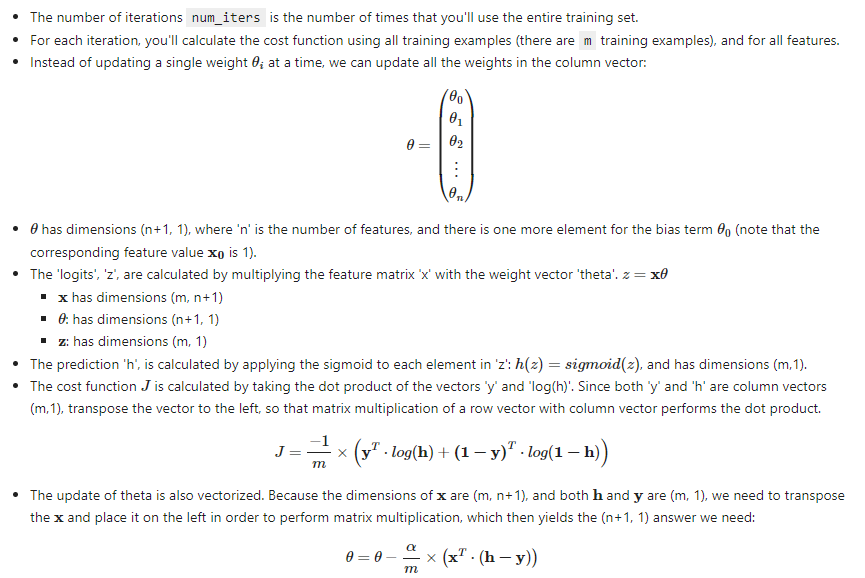

In [17]:
def gradientDescent(x, y, theta, alpha, num_iters):
    """_summary_

    Args:
        x (m, n+1): Matrix of features
        y (m, 1): corresponding labels of the input matrix x
        theta (n + 1, 1): Weight vector of dimension
        alpha (1, 1): learning rate
        num_iter (_type_): number of iterations you want to train our model for
    """
    # Get the number of rows in matrix x
    m = x.shape[0]
    
    for i in range(0, num_iters):
        
        # get z, the dot product of x and theta
        z = np.dot(x, theta)
        
        # Get the sigmoid of z
        h = sigmoid(z)
        
        # Calculate the cost function
        J = -1./m * (np.dot(y.transpose(), np.log(h)) + np.dot((1 - y).transpose(), np.log(1-h)))
        
        # Update the weights theta
        theta = theta - (alpha/m) * np.dot(x.transpose(), (h-y))
        
    
    
    J = float(J)
    return J, theta

In [18]:
np.random.seed(1)

tmp_X = np.append(np.ones((10, 1)), np.random.rand(10, 2) * 2000, axis = 1)
tmp_Y = (np.random.rand(10, 1) > 0.35).astype(float)

# Apply Gradient descent
tmp_J , tmp_theta = gradientDescent(tmp_X, tmp_Y, np.zeros((3,1)), 1e-8, 700)

print(f"The cost after training is {tmp_J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(tmp_theta)]}")

The cost after training is 0.67094970.
The resulting vector of weights is [4.1e-07, 0.00035658, 7.309e-05]


**Extracting the features**

This function takes in a single tweet.
Process the tweet using the imported process_tweet() function and save the list of tweet words.
Loop through each word in the list of processed words
For each word, check the freqs dictionary for the count when that word has a positive '1' label. (Check for the key (word, 1.0)
Do the same for the count for when the word is associated with the negative label '0'. (Check for the key (word, 0.0).)

In [21]:
def extract_features(tweet, freqs):
    
    # Process_tweet tokenizes, stems, and remove stopwords
    word_1 = process_tweet(tweet)
    
    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3))
    
    # bias term is set to 1
    x[0, 0] = 1
    
    for word in word_1:
        # Increament the word count for the positive label 1
        x[0, 1] += freqs.get((word, 1.0), 0)
        
        # Increament the word count for the negative label 0
        x[0, 2] += freqs.get((word, 0.0), 0)
        
    assert(x.shape == (1, 3))
    return x    


In [22]:
tmp1 = extract_features(train_x[0], freqs)
print(tmp1)

[[1.000e+00 3.081e+03 0.000e+00]]


In [23]:
train_x[0]

'#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)'

In [25]:
# check for when the words are not in the freqs dictionary
tmp2 = extract_features('blorb bleeeeb bloooob', freqs)
print(tmp2)

[[1. 0. 0.]]


**Training Your Model**

To train the model:

Stack the features for all training examples into a matrix X.
Call gradientDescent, which you've implemented above.

In [26]:
X = np.zeros((len(train_x), 3))

for i in range(len(train_x)):
    X[i, :] = extract_features(train_x[i], freqs)
    
# Training labels corresponding to X    
Y = train_y

# Apply gradient descent
J, theta = gradientDescent(X, Y, np.zeros((3, 1)), 1e-9, 1500)

print(f"The cost after training is {J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

The cost after training is 0.13914328.
The resulting vector of weights is [3.1e-07, 0.00076294, 0.0]


**Test your logistic regression**

Predict whether a tweet is positive or negative.

Given a tweet, process it, then extract the features.
Apply the model's learned weights on the features to get the logits.
Apply the sigmoid to the logits to get the prediction (a value between 0 and 1).

In [27]:
def predict_tweet(tweet, freqs, theta):
    
    
    # Extract the features of the tweet and store it into x
    x = extract_features(tweet, freqs)
    
    # Make the prediction using X and theta
    y_pred = sigmoid(np.dot(x, theta))
    
    
    return y_pred

In [28]:
# Run this cell to test your function
for tweet in ['I am happy', 'I am bad', 'this movie should have been great.', 'great', 'great great', 'great great great', 'great great great great']:
    print( '%s -> %f' % (tweet, predict_tweet(tweet, freqs, theta)))

I am happy -> 0.534089
I am bad -> 0.512967
this movie should have been great. -> 0.534848
great -> 0.528389
great great -> 0.556596
great great great -> 0.584442
great great great great -> 0.611760


In [30]:
my_tweet = 'I am learning :)'
predict_tweet(my_tweet, freqs, theta)

array([[0.89848417]])

**Check performance using the test set**

Use np.asarray() to convert a list to a numpy array
Use np.squeeze() to make an (m,1) dimensional array into an (m,) array

In [31]:
def test_logistic_regression(test_x, test_y, freqs, theta):
    """
    Input: 
        test_x: a list of tweets
        test_y: (m, 1) vector with the corresponding labels for the list of tweets
        freqs: a dictionary with the frequency of each pair (or tuple)
        theta: weight vector of dimension (3, 1)
    Output: 
        accuracy: (# of tweets classified correctly) / (total # of tweets)
    """
    
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    
    # the list for storing predictions
    y_hat = []
    
    for tweet in test_x:
        # get the label prediction for the tweet
        y_pred = predict_tweet(tweet, freqs, theta)
        
        if y_pred > 0.5:
            # append 1.0 to the list
            y_hat.append(1)
        else:
            # append 0 to the list
            y_hat.append(0)

    # With the above implementation, y_hat is a list, but test_y is (m,1) array
    # convert both to one-dimensional arrays in order to compare them using the '==' operator
    accuracy = (y_hat==np.squeeze(test_y)).sum()/len(test_x)

    ### END CODE HERE ###
    
    return accuracy

**Error Analysis**

In this part you will see some tweets that your model misclassified. Why do you think the misclassifications happened? Specifically what kind of tweets does your model misclassify?

In [32]:
tmp_accuracy = test_logistic_regression(test_x, test_y, freqs, theta)
print(f"Logistic regression model's accuracy = {tmp_accuracy:.4f}")

Logistic regression model's accuracy = 1.0000


In [34]:
# Some error analysis done for you
print('Label Predicted Tweet')
for x,y in zip(test_x,test_y):
    y_hat = predict_tweet(x, freqs, theta)

    if np.abs(y - (y_hat > 0.5)) > 0:
        print('THE TWEET IS:', x)
        print('THE PROCESSED TWEET IS:', process_tweet(x))
        print('%d\t%0.8f\t%s' % (y, y_hat, ' '.join(process_tweet(x)).encode('ascii', 'ignore')))

Label Predicted Tweet
